# Decision Trees - Entscheidungsbäume

# Decision Trees (Entscheidungsbäume)  und Random Forest

Zuerst einige Packages laden:

In [24]:
if (!require("rpart")) install.packages("rpart")
if (!require("rpart.plot")) install.packages("rpart.plot")
if (!require("rattle")) install.packages("rattle")
if (!require("caret")) install.packages("caret")
if (!require("randomForest")) install.packages("randomForest")

Loading required package: randomForest
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin

The following object is masked from 'package:rattle':

    importance



Wir wollen zuerst das Beispiel aus dem Skript "Tennis" nachvollziehen. Dazu laden wir den Datensatz und 
geben mit *str* die Struktur des Datensatzes aus:

In [8]:
tennis <- read.csv("tennis.csv", sep=";")

In [9]:
str(tennis)

'data.frame':	14 obs. of  5 variables:
 $ Witterung       : Factor w/ 3 levels "Bedeckt","Regnerisch",..: 2 2 1 3 3 3 1 2 2 3 ...
 $ Temperatur      : Factor w/ 3 levels "Heiss","Kalt",..: 1 1 1 3 2 2 2 3 2 3 ...
 $ Luftfeuchtigkeit: Factor w/ 2 levels "Hoch","Normal": 1 1 1 1 2 2 2 1 2 2 ...
 $ Windig          : logi  FALSE TRUE FALSE FALSE FALSE TRUE ...
 $ TennisGespielt  : logi  FALSE FALSE TRUE TRUE TRUE FALSE ...


Wir geben die ersten 6 Zeilen aus dem Datensatz aus:

In [10]:
head(tennis)

Witterung,Temperatur,Luftfeuchtigkeit,Windig,TennisGespielt
<fct>,<fct>,<fct>,<lgl>,<lgl>
Regnerisch,Heiss,Hoch,FALSE,FALSE
Regnerisch,Heiss,Hoch,TRUE,FALSE
Bedeckt,Heiss,Hoch,FALSE,TRUE
Sonnig,Mild,Hoch,FALSE,TRUE
Sonnig,Kalt,Normal,FALSE,TRUE
Sonnig,Kalt,Normal,TRUE,FALSE


Es sind zu wenig Daten, um den Datensatz noch in ein Trainings- und Testdatensatz aufzuteilen. Hier geht es erst Mal um das Erstellen eines Modells, also eines Decision Trees. Dieses Modell wird nun erstellt:

In [11]:
model.tennis <- rpart(TennisGespielt~., data=tennis, control=rpart.control(minbucket = 1, minsplit = 1))

Nun plotten wir den Baum:

rpart.plot(model.tennis)

In [ ]:
Etwas hübschere Plots mit fancyRpartPlot aus dem Package "rattle":

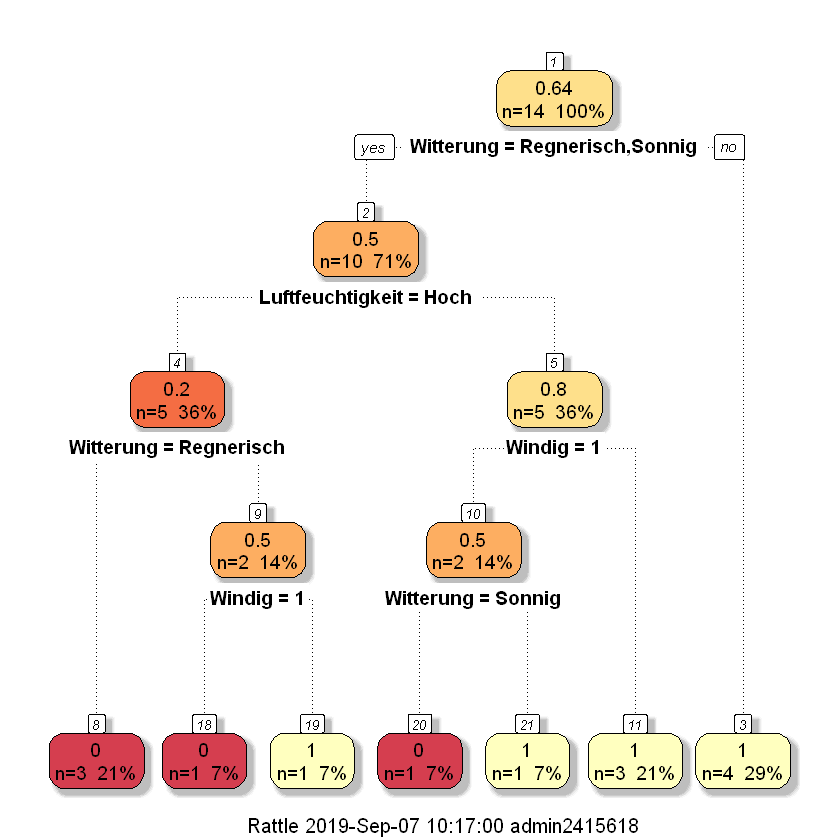

In [13]:
fancyRpartPlot(model.tennis, palettes=c("Spectral"))

# Weiteres Beispiel: IRIS-Datensatz

Nun ein etwas umfangreicheres Beispiel: Wir verwenden den Datensatz IRIS mit immerhin 150 Zeilen (Beobachtungen). Wir laden den Datensatz (wird standardmäßig mit R mitgeliefert) und geben die Struktur des Datensatzes sowie die ersten 6 Zeilen aus:

In [15]:
data(iris)
str(iris)
head(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


Nun teilen wir den Datensatz in Trainings- und Testdaten auf. Wir verwenden hierfür die Funktion *createDataPartition* aus dem Package *caret*. 70% der Daten kommen in den Trainings-, 30% in den Testdatensatz:

In [16]:
set.seed(42)
index <- createDataPartition(iris$Species, p=0.7, list=F)
train <- iris[index, ]
test  <- iris[-index, ]

Nun erstellen wir wieder das Modell mit der Funktion *rpart*:

In [17]:
model <- rpart(Species~., data=train)

Wir geben mit *rpart.plot* den Baum aus:

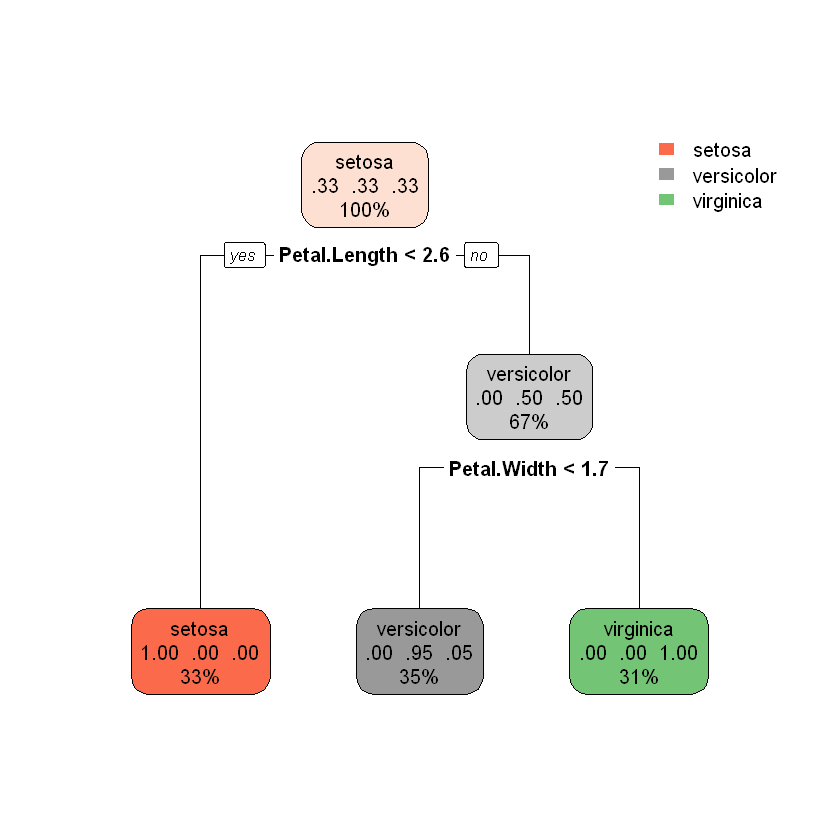

In [18]:
rpart.plot(model)

Wie gut ist  unser Modell? Um das festzustellen, erstellen wir basierend auf dem soeben erstellten Modell eine Vorhersage, gespeichert in *pred*:

In [19]:
pred <- predict(model, test, type="class")

Mit Hilfe der Funktion *confusionMatrix* aus dem *caret* - Package erhalten wir viele Informationen über die Qualität unseres Modells, u.a. die sog. Accuracy:

In [20]:
confusionMatrix(pred, test$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         13         2
  virginica       0          2        13

Overall Statistics
                                          
               Accuracy : 0.9111          
                 95% CI : (0.7878, 0.9752)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 8.467e-16       
                                          
                  Kappa : 0.8667          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.8667           0.8667
Specificity                 1.0000            0.9333           0.9333
Pos Pred Value              1.0000            0.8667           0.8667
Neg Pred Value              1.0000            0.9333           0.9333
P

Die Accuracy beträgt immerhin ca. 91%!

# k-Fold-Cross-Validation

Nun wenden wir noch die k-Fold-Cross-Validation an, um unser Modell besser zu testen. Mit Hilfe der Funktion *createFolds* erstellen wir insgesamt 10 Trainings- bzw. Testdatensätze (k=10). Diese Mengen sind jeweils disjunkt.

In [21]:
folds <- createFolds(train$Species, k=10, returnTrain = T)

Wir erstellen nun einen leeren Vektor *accuracies*, in dem die Accuracies für alle 10 Folds gespeichert werden. In einer Schleife erstellen wir für alle Folds ein Modell, ermitteln die Vorhersagen (*pred*) und ermitteln die Accuracy-Werte:

In [22]:
# Vektor für Accuracies
accuracies <- numeric()

# Berechne für jeden Fold ein Modell und ermittle die Accuracy
ctrl <- rpart.control(minsplit = 1)
for(f in folds){
  model <- rpart(Species~., data=train[f,], control=ctrl)
  pred <- predict(model, test, type="class")
  cm <- confusionMatrix(test$Species, pred)
  accuracies <- c(accuracies, cm$overall["Accuracy"])
}

Wir geben die 10 Accuracy-Werte aus und berechnen damit noch den Mittelwert mit *mean* sowie die Varianz mit *var*. Wir stellen fest, dass das Modell sehr stabil ist:

In [23]:
# berechne Mittelwert und Varianz aus den Accuracies
print(accuracies)
mean(accuracies)
var(accuracies)

 Accuracy  Accuracy  Accuracy  Accuracy  Accuracy  Accuracy  Accuracy  Accuracy 
0.9333333 0.9111111 0.9333333 0.9333333 0.8888889 0.9333333 0.9333333 0.9333333 
 Accuracy  Accuracy 
0.9333333 0.9333333 


[1] 0.9266667

[1] 0.0002249657

# Random Forest

Schließlich erstellen wir noch einen Random Forest. Wir erstellen 500 Bäume!

In [25]:
model <- randomForest(Species~., data=train, ntree=500)

Mit *plot* erhalten wir Informationen über unser Modell in grafisch aufbereitet Form (das Plotten von 500 Bäumen macht nicht wirklich einen Sinn!). Wir stellen fest, dass sich ab ca. 50 Bäumen der Fehler (Error) nicht mehr ändert. Somit hätten 50 Bäume auch gereicht - zumindest für die vorliegenden Daten.

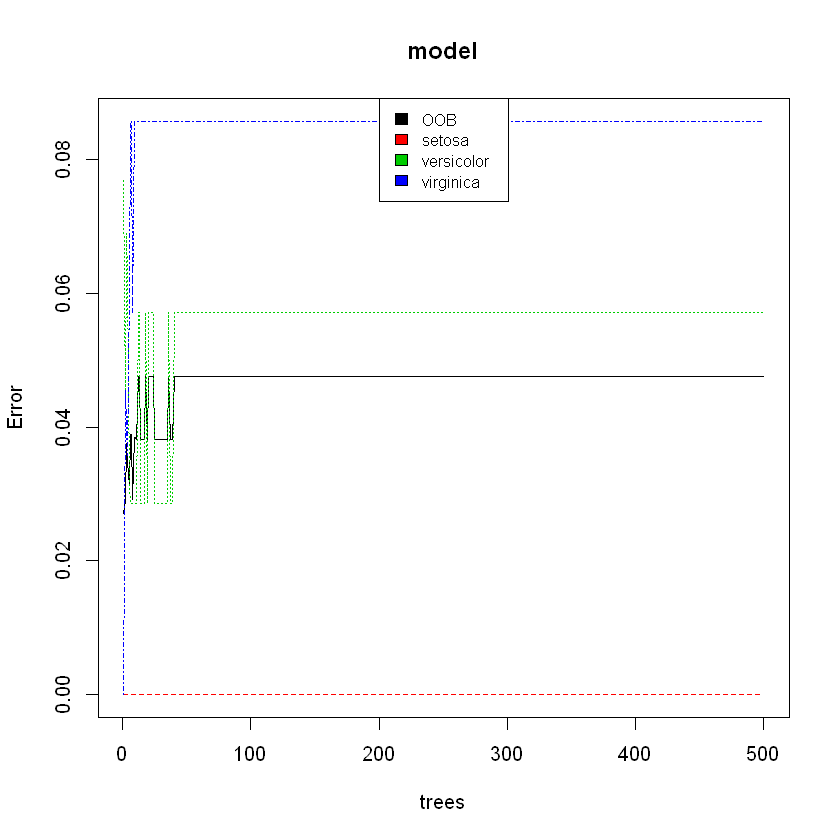

In [27]:
plot(model)
legend("top", colnames(model$err.rate),col=1:4,cex=0.8,fill=1:4)

Schließlich wollen wir auch mit unserem Random Forest noch die Qualtiät bestimmen. Wie vorher ermitteln wir Vorhersagen (*pred*) und erstellen eine ConfusionMatrix:

In [28]:
pred <- predict(model, test, type="class")

confusionMatrix(pred, test$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         13         1
  virginica       0          2        14

Overall Statistics
                                         
               Accuracy : 0.9333         
                 95% CI : (0.8173, 0.986)
    No Information Rate : 0.3333         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.9            
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.8667           0.9333
Specificity                 1.0000            0.9667           0.9333
Pos Pred Value              1.0000            0.9286           0.8750
Neg Pred Value              1.0000            0.9355           0.9655
Prevalence